# Property Valuation Models
Description

## Preprocessing

### Importing data

In [15]:
import sqlite3
import pandas as pd
import numpy as np

conn = sqlite3.connect("./data/data.db")
df = pd.read_sql_query(f"SELECT * FROM sales", conn)
conn.close()

# only import random 1000 lines
df = df.sample(n=10000, random_state=1)

print(df.columns)

Index(['ID', 'Agent Name', 'Agent ID', 'Address', 'City', 'Province',
       'Postal Code', 'Municipality', 'Number of Bedrooms', 'Number of Rooms',
       'Plot Area', 'Floor Area', 'Object Type', 'Energy Label',
       'Construction Type', 'Offering Type', 'Selling Price',
       'Selling Price Type', 'Selling Price Condition', 'Zoning',
       'Publish Date', 'Status'],
      dtype='object')


### Encoding variables

In [16]:
# Drop NA and Duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# drop object type == parking
df = df[df['Object Type'] != "Parking"]
# drop outliers selling price <100000 and > 10000000
df = df[(df['Selling Price'] > 100000) & (df['Selling Price'] < 10000000)]

# Encode categorical features
df["Agent Name"] = df["Agent Name"].astype("category").cat.codes
df["City"] = df["City"].astype("category").cat.codes
df["Province"] = df["Province"].astype("category").cat.codes
df["Municipality"] = df["Municipality"].astype("category").cat.codes
df["Object Type"] = df["Object Type"].astype("category").cat.codes
df["Energy Label"] = df["Energy Label"].astype("category").cat.codes
df["Construction Type"] = df["Construction Type"].astype("category").cat.codes

### Subsetting the data

In [17]:
# Select subset
df_sub = df[['Agent Name', 
    'City', 'Province',
    'Number of Bedrooms', 'Number of Rooms',
    'Plot Area', 'Floor Area', 
    'Object Type', 'Energy Label', 'Construction Type', 
    'Selling Price'
    ]]

print(df_sub.head())

        Agent Name  City  ...  Construction Type  Selling Price
159371        2666   921  ...                  1       425000.0
79017         2569   814  ...                  1       375000.0
80675          716  1278  ...                  1       290000.0
94483         1552    31  ...                  1       350000.0
108841         912   527  ...                  0       549000.0

[5 rows x 11 columns]


### Splitting data

In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd
# Define X and y
X = df_sub.drop(columns=['Selling Price'])
y = df_sub['Selling Price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression
Simple hedonic linear regression baseline model

Mean Absolute Error: 107743.46221873657
Root Mean Squared Error: 165336.954538968
R^2 Score: 0.5738236294685275


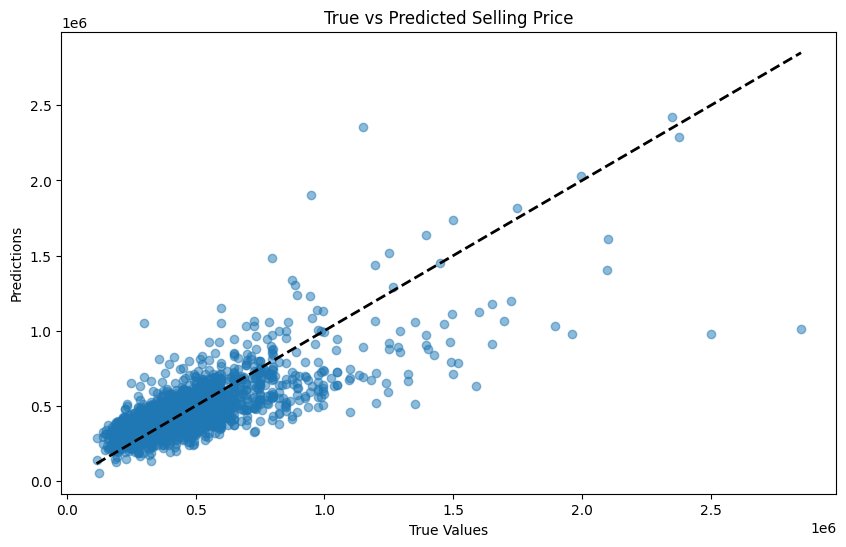

In [20]:
from sklearn.linear_model import LinearRegression

# Create model
lr_model = LinearRegression()

# Fit model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate model, r2, mse, rmse
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# plot the results
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Selling Price')
plt.show()

# Random Forest
Random Forest Model

In [ ]:
# Create model